In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv' , delimiter=',' , encoding='ISO-8859-1')

In [3]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.shape

(1048572, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


# Data Cleaning and EDA

In [6]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [7]:
df.drop(['id of the tweet', 'date of the tweet', 'query', 'user'], axis=1, inplace=True)

In [8]:
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
df.columns = ['sentiment', 'text']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1048572 non-null  int64 
 1   text       1048572 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [11]:
df['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

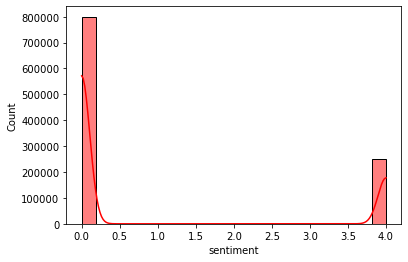

In [12]:
sns.histplot(df['sentiment'], kde=True, color = 'r')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

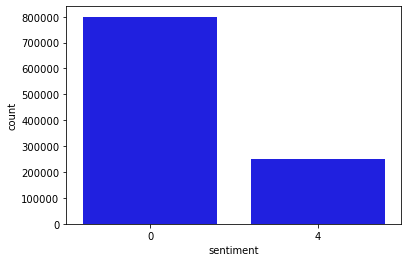

In [13]:
sns.countplot(x=df['sentiment'] , color= 'b')

# Text Preprocessing

In [14]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [15]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [16]:
final_corpus = []
final_corpus_joined = []
for i in df.index:
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)


In [17]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [18]:
data_cleaned

,text,sentiment
0,upset updat facebook text might cri result sch...,0
1,kenichan dive mani time ball manag save rest g...,0
2,whole bodi feel itchi like fire,0
3,nationwideclass behav mad see,0
4,kwesidei whole crew,0
...,...,...
1048567,grandma make dinenr mum,4
1048568,mid morn snack time bowl chees noodl yum,4
1048569,shadela say like termini movi come like word,4
1048570,destinyhop im great thaank wbuu,4


In [19]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[upset, updat, facebook, text, might, cri, res...",0
1,"[kenichan, dive, mani, time, ball, manag, save...",0
2,"[whole, bodi, feel, itchi, like, fire]",0
3,"[nationwideclass, behav, mad, see]",0
4,"[kwesidei, whole, crew]",0


# Word Cloud

In [20]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [21]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

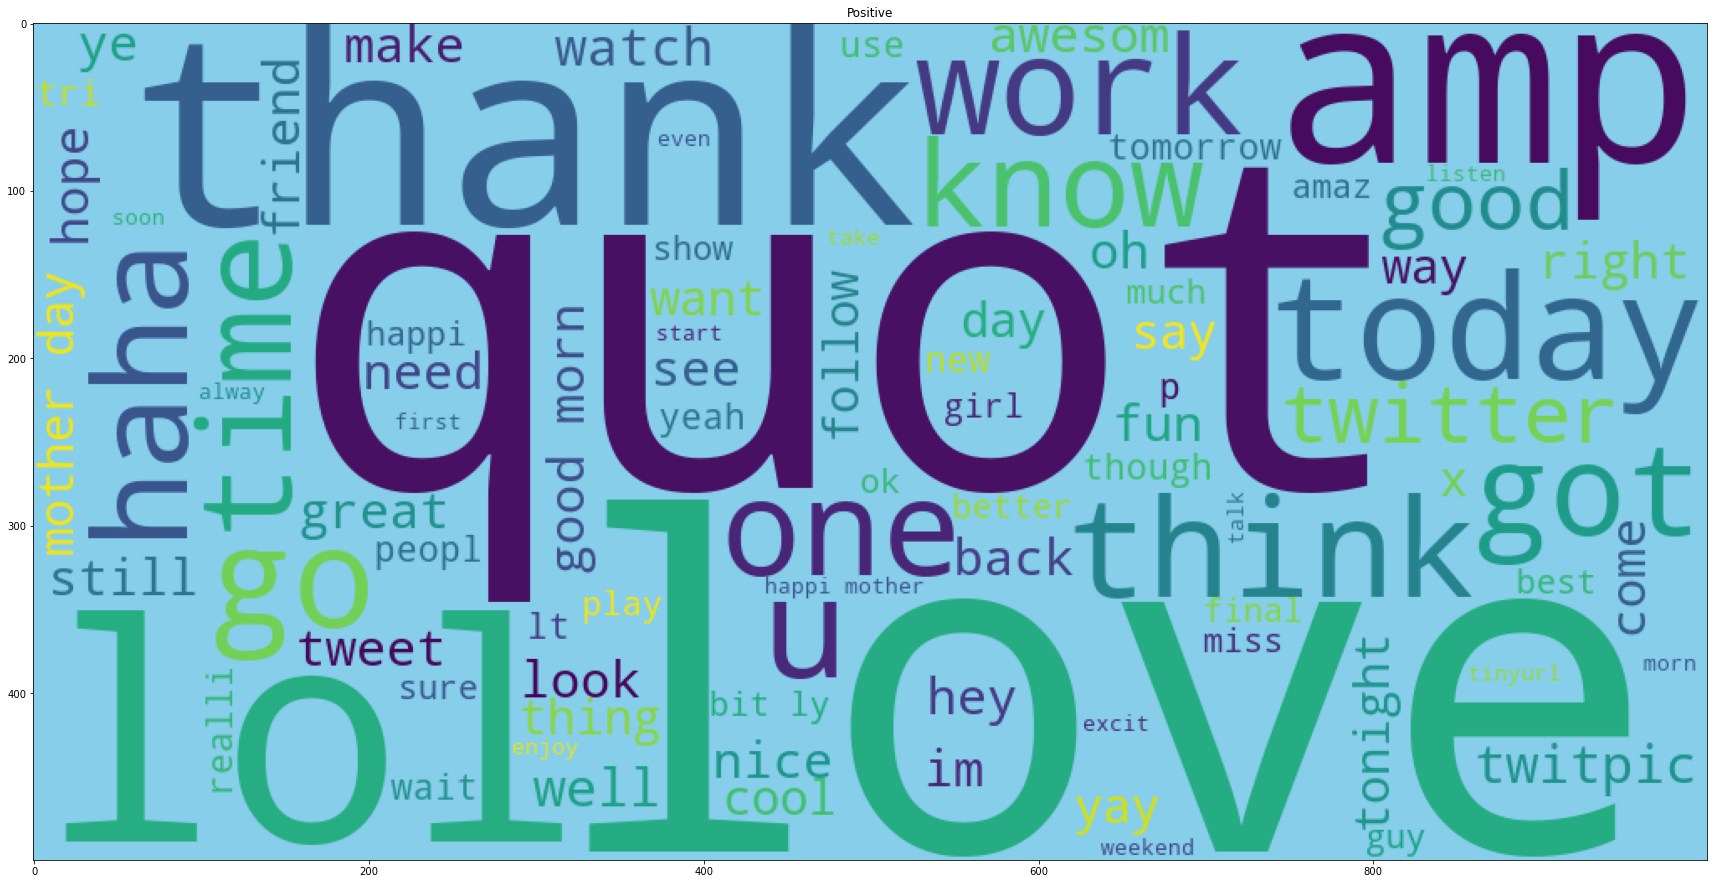

In [22]:
#FOR POSITIVES
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

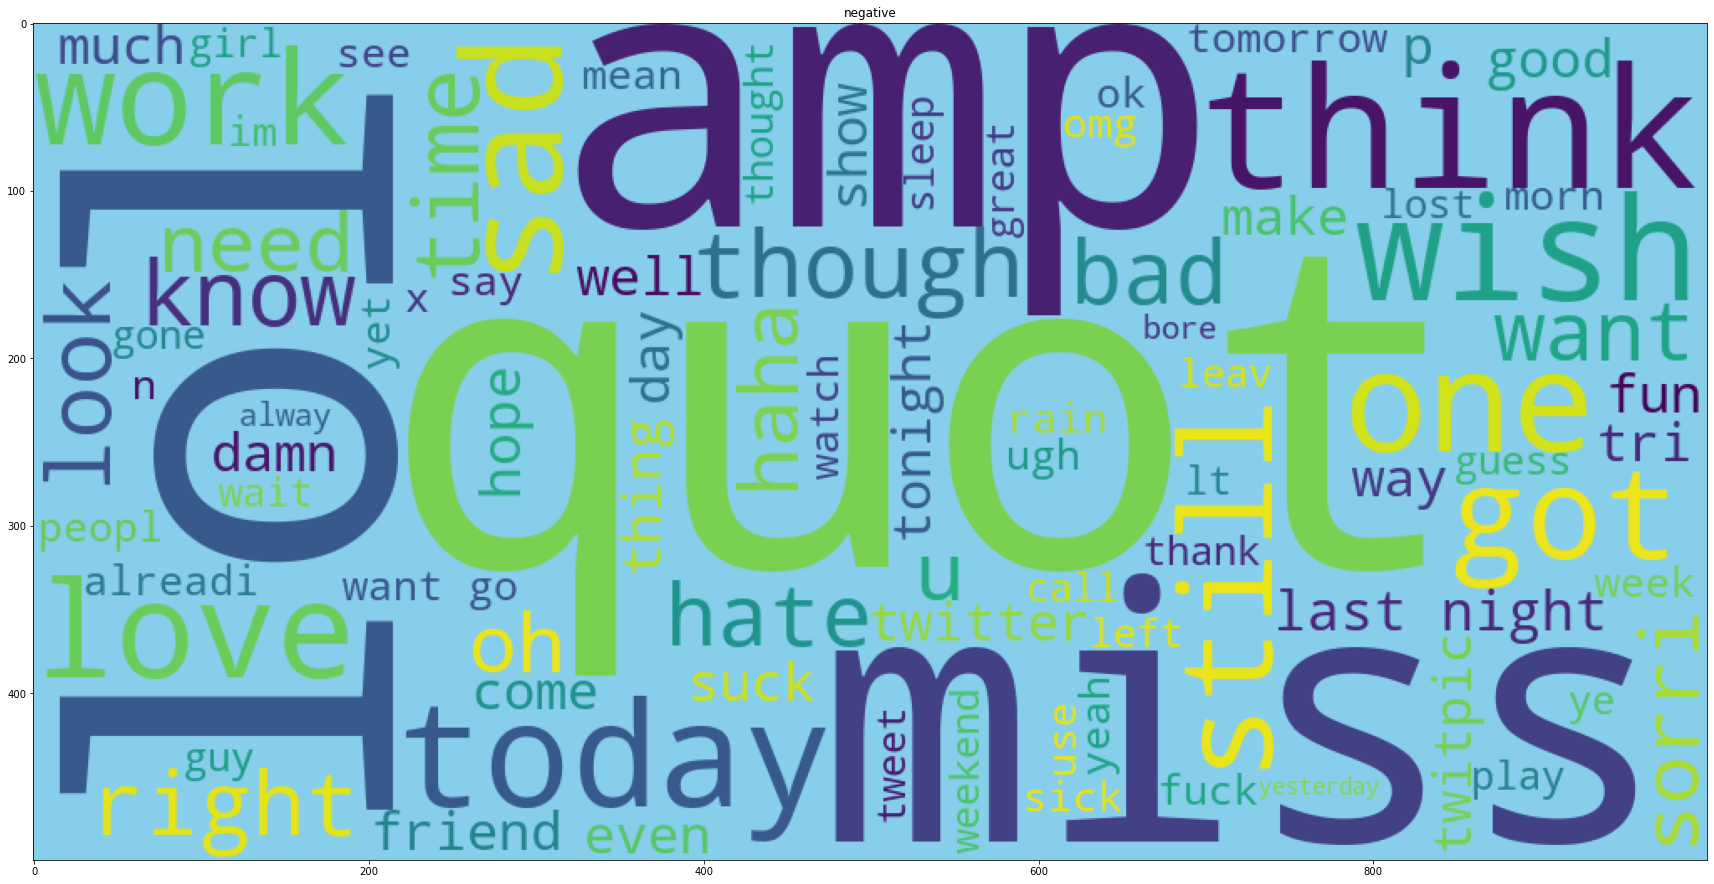

In [23]:
#FOR NEGATIVES
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()


# Text Vectorization

In [24]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90    160130
           4       0.73      0.46      0.57     49585

    accuracy                           0.83    209715
   macro avg       0.79      0.70      0.73    209715
weighted avg       0.82      0.83      0.82    209715



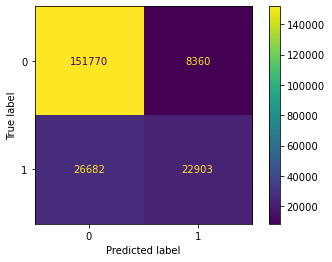

In [30]:
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

In [31]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


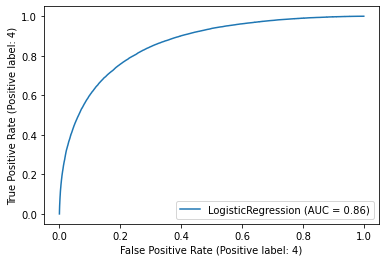

In [32]:
plot_roc_curve(model,X_test,y_test)

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


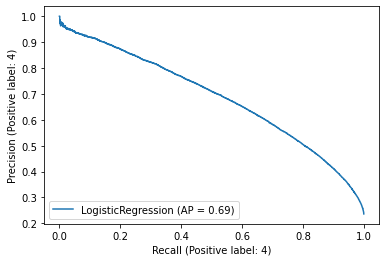

In [33]:
plot_precision_recall_curve(model,X_test,y_test)

In [34]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC

In [ ]:
#Naive Bayes

In [35]:
NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred1 = NB.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    160130
           4       0.87      0.10      0.18     49585

    accuracy                           0.78    209715
   macro avg       0.83      0.55      0.53    209715
weighted avg       0.80      0.78      0.71    209715



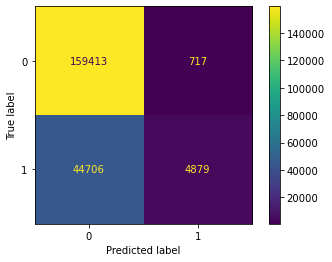

In [38]:
t2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
t2.plot()

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


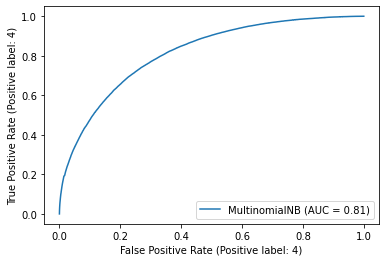

In [39]:
plot_roc_curve(NB,X_test,y_test)

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


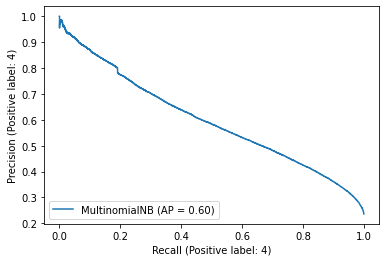

In [40]:
plot_precision_recall_curve(NB,X_test,y_test)

In [37]:
#SVM

In [41]:
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [42]:
y_pred2 = svc.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89    160130
           4       0.70      0.49      0.57     49585

    accuracy                           0.83    209715
   macro avg       0.78      0.71      0.73    209715
weighted avg       0.82      0.83      0.82    209715



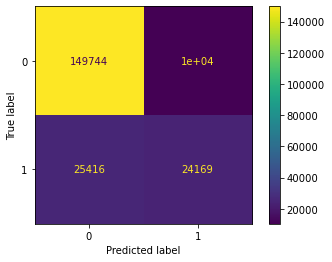

In [44]:
t3 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
t3.plot()

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


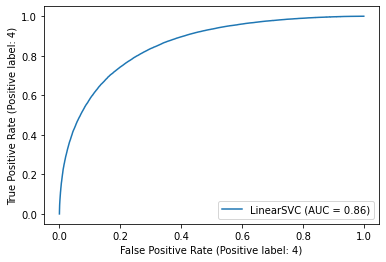

In [45]:
plot_roc_curve(svc,X_test,y_test)

C:\Users\gayatri_amrutkar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


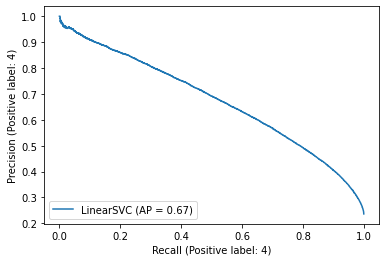

In [46]:
plot_precision_recall_curve(svc,X_test,y_test)